## Tutorial #8 - Mid-circuit measurements
In classical computations, inserting control flow — e.g, if statements — right in the middle of a large computation is no problem at all since measuring variables does not affect the output of the computation. The same can't be said about quantum computations — if we measure, we better be careful!

In this challenge, you'll look at how mid-circuit measurements work in PennyLane.

**Challenge code**
In the code below, you are given a function called circuit. You must complete this function by constructing the following four-qubit circuit:
![circuit](./images/8.Stuck%20in%20the%20Middle%20with%20U_1.png)
The circuit has a Hadamard gate on every qubit, an $R_x$ gate, a couple of CNOTs, and then the mid-circuit measurements. Note here that the measurements happen on the first and third qubits, and that the [qml.U3](https://docs.pennylane.ai/en/stable/code/api/pennylane.U3.html) gate is only applied to the fourth qubit if the following condition is met upon measuring the first and third wires: $m_0 + m_2 >=1$ (i.e. at least one of them is $1$). The last operator, `qml.PauliZ` on the fourth qubit, is applied regardless.

The [qml.measure](https://docs.pennylane.ai/en/stable/code/api/pennylane.measure.html) function should be helpful to you!

**Input**
As input to this problem, you are given:

* angles (list(float)): a list of angles containing $\theta_0$,$\theta_1$ , $\theta_2$, and $\theta_3$ in that order. Use this to create the circuit!

**Output**
This code must output a numpy.tensor containing the probabilities associated to a computational basis measurement on the fourth

In [1]:
import json
import pennylane as qml
import pennylane.numpy as np
n_qubits = 4
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def circuit(angles):
    qml.broadcast(qml.Hadamard, wires=range(n_qubits), pattern='single')
    qml.RX(angles[0],0)
    qml.CNOT(wires=[0,3])
    qml.CNOT(wires=[2,1])

    output = qml.measure(wires=0)+qml.measure(wires=2)

    qml.cond(output >= 1, qml.U3)(angles[1],angles[2],angles[3],wires= 3)
    qml.PauliZ(3)

    return qml.probs(wires=3)

(<Figure size 1100x500 with 1 Axes>, <Axes: >)


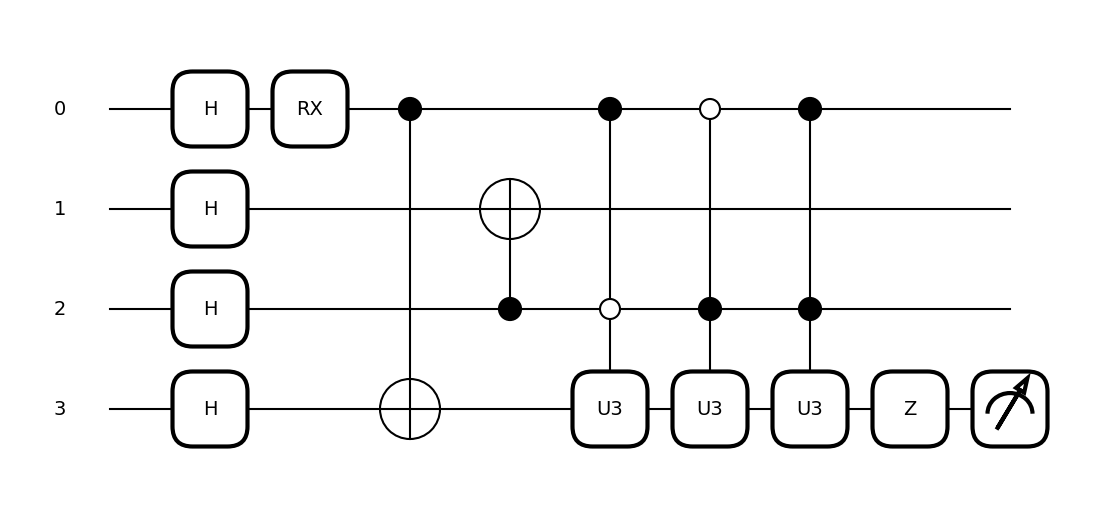

In [4]:
angles = [1.0, 1.5, 2.0, 2.5]

print(qml.draw_mpl(circuit)(angles))

In [5]:
import json
import pennylane as qml
import pennylane.numpy as np

n_qubits = 4
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def circuit(angles):
    """A quantum circuit made from the quantum function U.

    Args:
        angles (list(float)): A list of angles containing theta_0, theta_1, theta_2, and theta_3 in that order.
    Returns:
        (numpy.tensor): The probability of the fourth qubit.
    """


    qml.broadcast(qml.Hadamard, wires=range(n_qubits), pattern='single')
    qml.RX(angles[0],0)
    qml.CNOT(wires=[0,3])
    qml.CNOT(wires=[2,1])

    output = qml.measure(wires=0)+qml.measure(wires=2)

    qml.cond(output >= 1, qml.U3)(angles[1],angles[2],angles[3],wires= 3)
    qml.PauliZ(3)


    return qml.probs(wires=3)


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    angles = json.loads(test_case_input)
    output = circuit(angles).tolist()
    return str(output)

def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)

    assert np.allclose(solution_output, expected_output, rtol=1e-4)


test_cases = [['[1.0, 1.5, 2.0, 2.5]', '[0.79967628, 0.20032372]']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '[1.0, 1.5, 2.0, 2.5]'...
Correct!
